In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Statistics libraries
from scipy import stats
from scipy.stats import norm

# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

# Import country code libraries
!pip install pycountry -q
import pycountry

#Install plot library
import plotly.io as pio
pio.renderers.default='notebook'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### <b>III <span style='color:#85BB65'>|</span> Input data</b>

In [2]:
data = pd.read_csv('/content/ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### <b> <span style='color:#85BB65'>|</span> Check Unique Value in each columns</b>

In [4]:
# Loop through each column and count the number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

work_year: 4 distinct values
experience_level: 4 distinct values
employment_type: 4 distinct values
job_title: 93 distinct values
salary: 815 distinct values
salary_currency: 20 distinct values
salary_in_usd: 1035 distinct values
employee_residence: 78 distinct values
remote_ratio: 3 distinct values
company_location: 72 distinct values
company_size: 3 distinct values


### <b> <span style='color:#85BB65'>|</span> Explore the data</b>

In [5]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### <b> <span style='color:#85BB65'>|</span> Rename the value for better understanding</b>

In [7]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

data['employment_type'] = data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
data['company_size'] = data['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
data['remote_ratio'] = data['remote_ratio'].astype(str)
data['remote_ratio'] = data['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

### <b>VI <span style='color:#85BB65'>|</span> Group the job title</b>

In [8]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
data['job_category'] = data['job_title'].apply(assign_broader_category)

In [9]:
# Inflation rates
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

# Function to adjust salary
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary

# Apply the function to the dataset
data['adjusted_salary'] = data.apply(adjust_salary, axis=1)

#------------
#credit : @rrrrrrita
#------------

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 3. Univariative Analysis</span></b> </div>

### <b>VIII <span style='color:#85BB65'>|</span> Job Distribution</b>

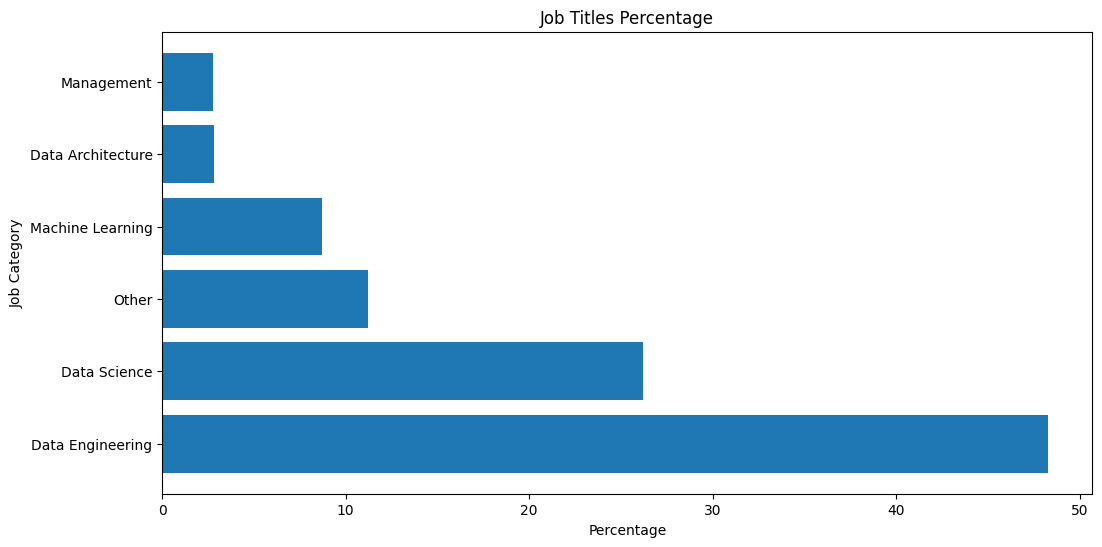

In [10]:
value_counts = data['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

### <b>IX <span style='color:#85BB65'>|</span> Distribution across different employment types</b>

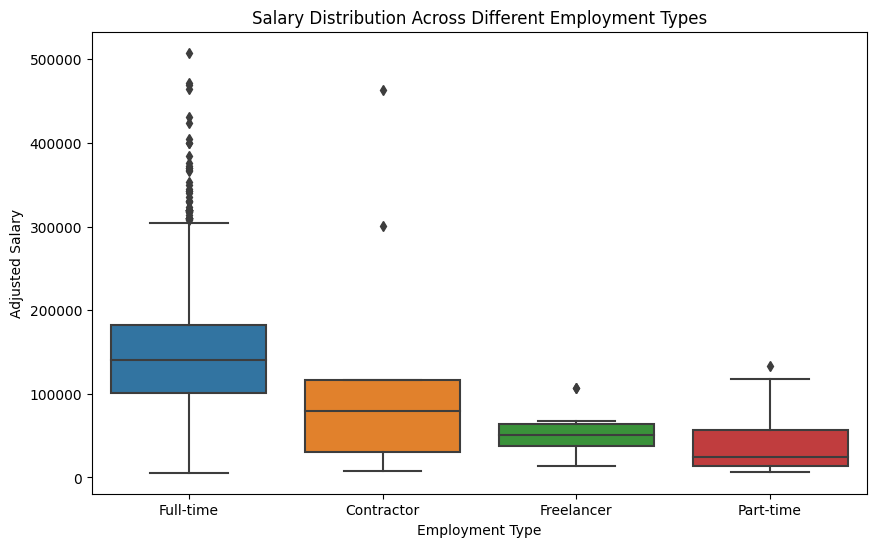

In [11]:
# Salary distribution across different employment types
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='employment_type', y='adjusted_salary')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

### <b>X <span style='color:#85BB65'>|</span> Distribution of Salary</b>

adjusted_salary: mu = 142445.66, sigma = 64692.98
adjusted_salary: Skewness: 0.58
adjusted_salary: Kurtosis: 1.14


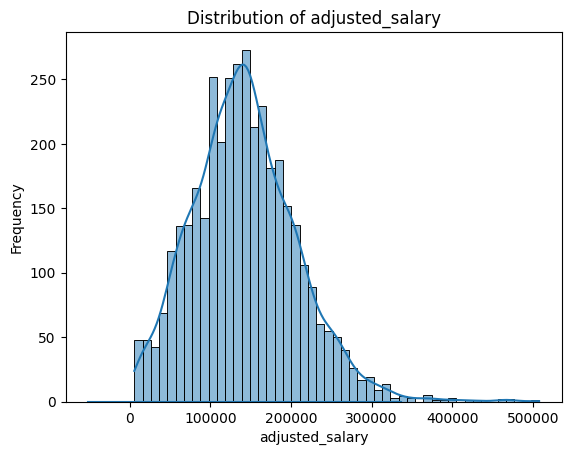

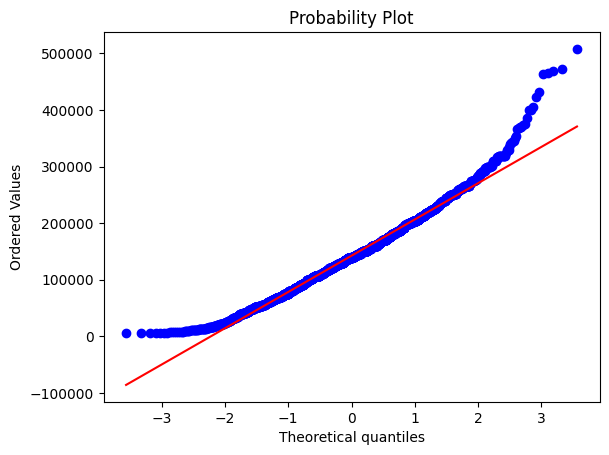

In [12]:
# Create a list of the columns to analyze
columns = ['adjusted_salary']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(data[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(data[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, data[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

    # Plot the QQ-plot
    fig = plt.figure()
    stats.probplot(data[col], plot=plt)

    plt.show()

### <b>XI <span style='color:#85BB65'>|</span> Boxplot and Swarmplot of Adjusted Salary</b>

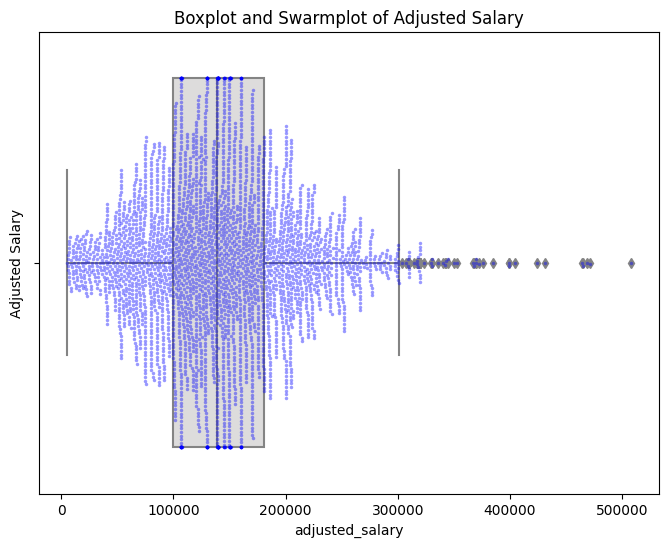

,adjusted_salary
count,3755.00
mean,142445.66
std,64701.59
min,5583.62
25%,100000.00
50%,139000.00
75%,181050.00
max,507946.58


In [13]:
# apply formatting to describe method for 'adjusted_salary' column
formatted_data = data.loc[:, 'adjusted_salary'].describe().apply(lambda x: f'{x:.2f}')

# create boxplot and swarmplot for 'adjusted_salary' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=data['adjusted_salary'], color='blue', alpha=0.4, size=2.5)
plt.ylabel('Adjusted Salary')
plt.title('Boxplot and Swarmplot of Adjusted Salary')
plt.show()

# apply styling to formatted data
styled_data = formatted_data.to_frame().style \
    .background_gradient(cmap='Blues') \
    .set_properties(**{'text-align': 'center', 'border': '1px solid black'})

# display styled data
display(styled_data)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 3. Bivariative Analysis</span></b> </div>

### <b>XII <span style='color:#85BB65'>|</span> Median salary by job title</b>

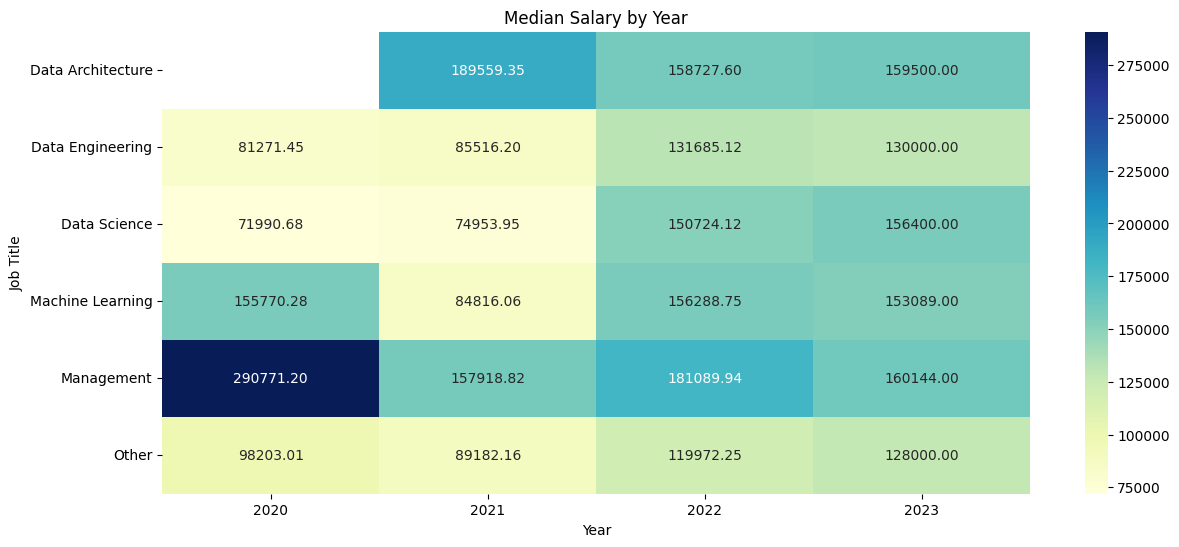

In [14]:
df = data.copy()

#  Median salary by job title
pivot_table = df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 4. Multivariative Analysis</span></b> </div>

### <b>XIII <span style='color:#85BB65'>|</span> Salary comparison between employee residence and company location</b>

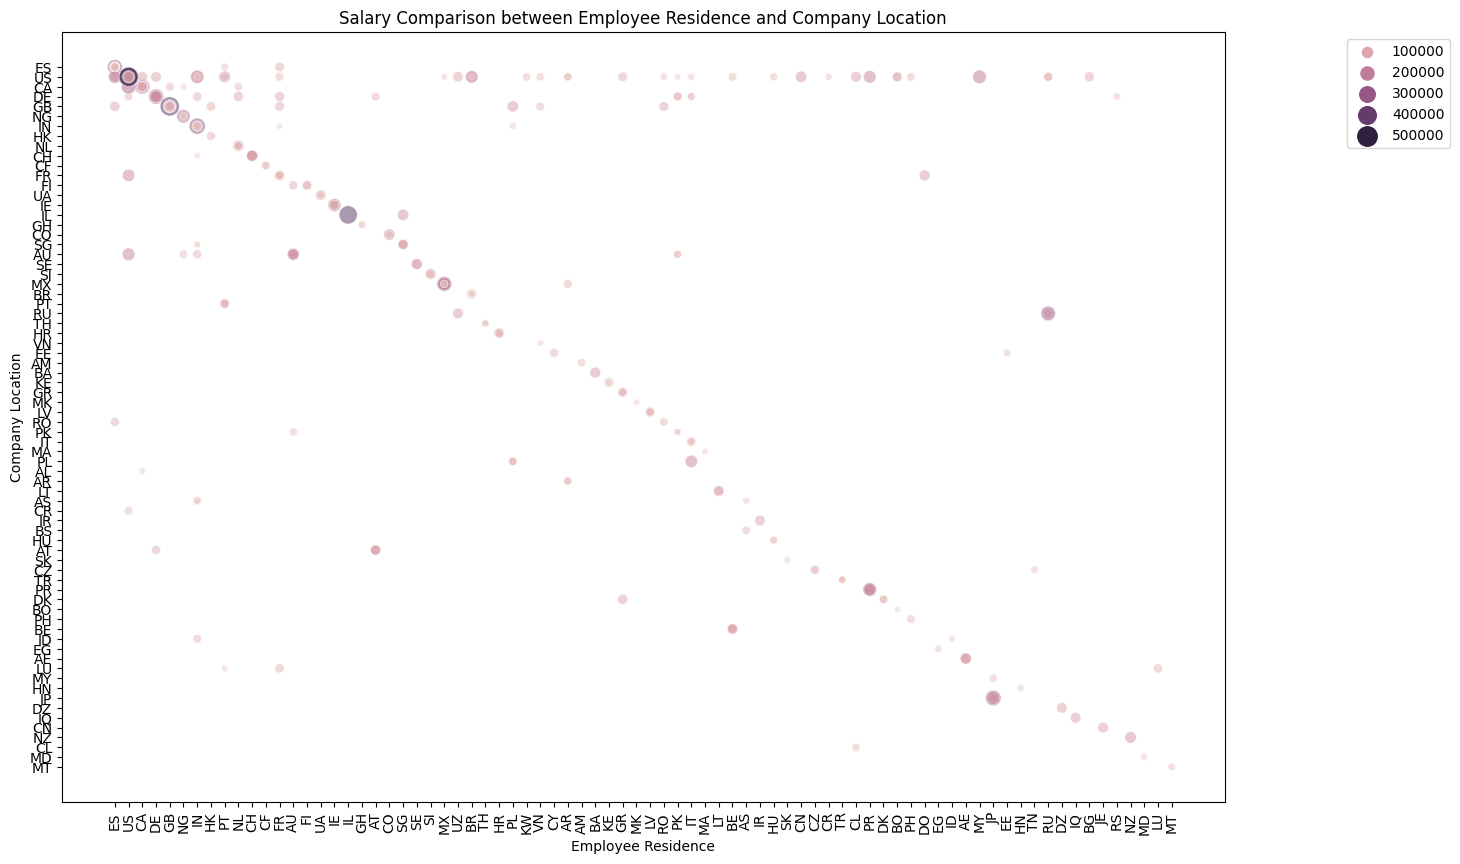

In [15]:
# Salary comparison between employee residence and company location
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='employee_residence', y='company_location', hue='adjusted_salary', size='adjusted_salary', sizes=(20, 200), alpha=0.5)
plt.title('Salary Comparison between Employee Residence and Company Location')
plt.xlabel('Employee Residence')
plt.ylabel('Company Location')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [20]:
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['adjusted_salary']

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2.Dealing with categorical variables</span></b> </div>

### <b>II <span style='color:#85BB65'>|</span> Create Dummy Variables</b>

In [21]:
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2.Preprocessing : Standard Scaler</span></b> </div>

### <b>III <span style='color:#85BB65'>|</span> Preprocessing and Scaling the data</b>

Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. **<span style='color:#85BB65'>Standardization</span>** is not required for all models but is generally a good practice. **<span style='color:#85BB65'>One-hot encoding</span>** is necessary for categorical variables to be correctly understood by the machine learning model.

The **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">StandardScaler</mark>** in sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.</p>

<p>In other words, given a feature vector <em>x</em>, it modifies the values as follows:</p>

<p class="formulaDsp">
\[ Y_i = \frac{x_i - \mu(\vec{x})}{\sigma(\vec{x})} \]
</p>

**where:**
<ul>
<li>\( x_i \) is the i-th element of the original feature vector \( \vec{x} \),</li>
<li>\( \mu(\vec{x}) \) is the mean of the feature vector, and</li>
<li>\( \sigma(\vec{x}) \) is the standard deviation of the feature vector.</li>
</ul>

<p>The transformed data \( Y \) (each \( Y_i \)) will have properties such that \( mean(Y) = 0 \) and \( std(Y) = 1 \).</p>

> This transformation is also known as Z-score normalization.


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [23]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary','salary_in_usd'], axis=1)

### <b>IV <span style='color:#85BB65'>|</span> Corelation Matrix with dummy variables</b>

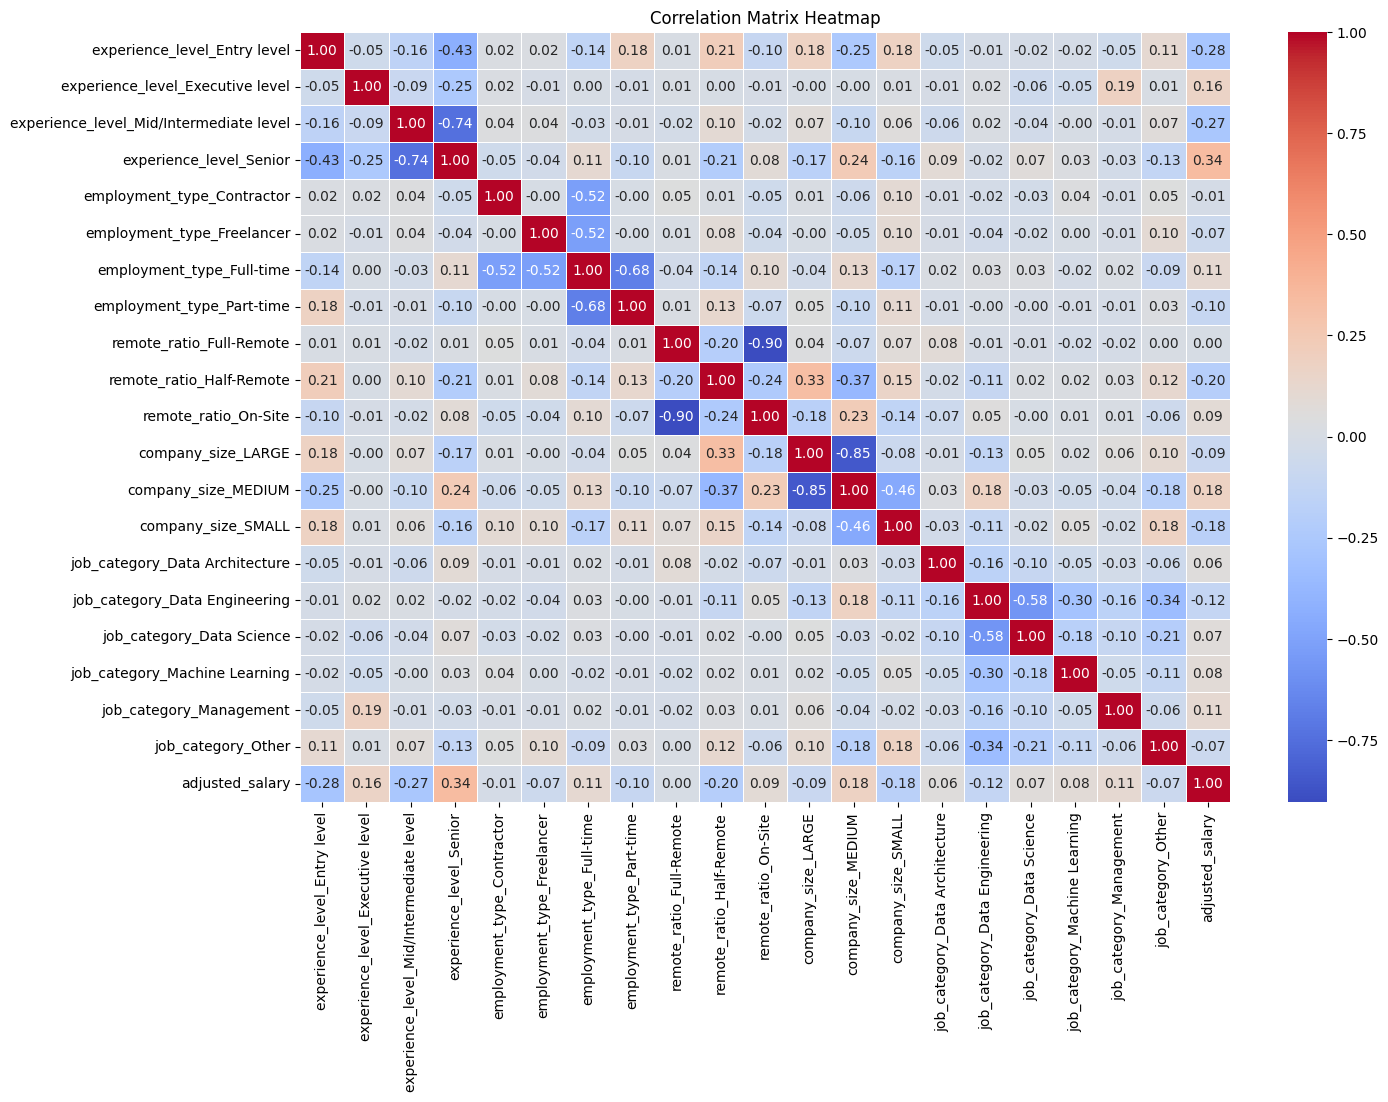

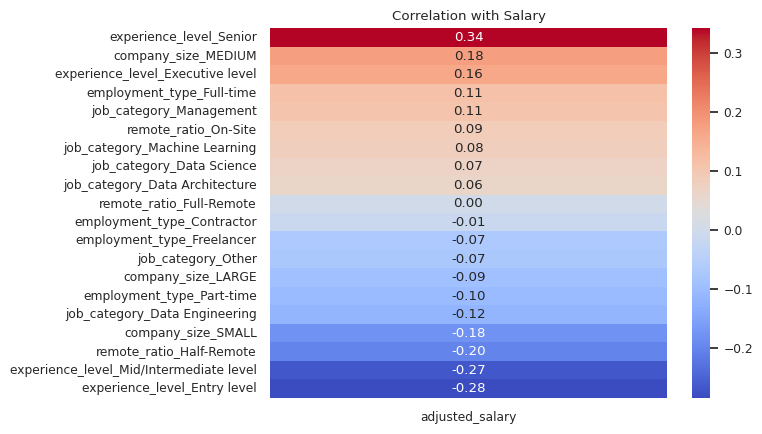

In [24]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['adjusted_salary'].drop('adjusted_salary')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Salary')
plt.show()

# <span style="color:#E888BB; font-size: 1%;">4 | PREDICTIVE ANALYSIS</span>
<div style="padding: 30px;color:white;margin:10;font-size:150%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/5466790/pexels-photo-5466790.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>4 | PREDICTIVE ANALYSIS</span></b> </div>

<br>

In this study, we aim to build a machine learning model that can predict data science job salaries based on a given set of features, such as `employment type`, `job category`, `experience level`, `employee residence`, `remote work ratio`, `company location`, and `company size`.To achieve our goal, we use a dataset containing information on data science job salaries and related features.

### <b><span style='color:#85BB65'>|</span> Important Features</b>

<br>

1. **`experience_level` [categorical] :** The experience level in the job during the year.

2. **`employment_type` [categorical] :** The type of employment for the role.

3. **`job_category` [categorical] :** The role worked in during the year.

4. **`adjusted_salary` [numerical] :** The present value salary in USD.

5. **`employee_residence` [categorical]:** Employee's primary country of residence in during the work year as an ISO 3166 country code.

6. **`remote_ratio` [ratio]:** The overall amount of work done remotely.

7. **`company_location` [categorical]:** The country of the employer's main office or contracting branch.

8. **`company_size` [categorical]:** The median number of people that worked for the company during the year as an ISO 3166 country code.

### <b>I <span style='color:#85BB65'>|</span> Data preparation</b>

In [25]:
# create dictionary of country code to country name mappings
country_map = {}
for country in pycountry.countries:
    country_map[country.alpha_2] = country.name
# replace values in 'employee_residence' column using dictionary
data['employee_residence'] = data['employee_residence'].replace(country_map)
data['company_location'] = data['company_location'].replace(country_map)

In [26]:
df = data.copy()
df = df.drop(['work_year','salary','salary_currency','salary_in_usd','salary_in_usd','job_title'], axis=1)

In [27]:
df.head()

,experience_level,employment_type,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,Senior,Full-time,Spain,Full-Remote,Spain,LARGE,Other,85847.0
1,Mid/Intermediate level,Contractor,United States,Full-Remote,United States,SMALL,Machine Learning,30000.0
2,Mid/Intermediate level,Contractor,United States,Full-Remote,United States,SMALL,Machine Learning,25500.0
3,Senior,Full-time,Canada,Full-Remote,Canada,MEDIUM,Data Science,175000.0
4,Senior,Full-time,Canada,Full-Remote,Canada,MEDIUM,Data Science,120000.0


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Clustering Analysis </span></b> </div>

### <b>II <span style='color:#85BB65'>|</span> Preprocessing</b>

<br>

The preprocessing step involved encoding of categorical variables and MinMax scaling for numerical variables:

#### **<span style='color:#85BB65'>Label encoding:</span>**
 Label encoding was applied to the categorical features. The categories of each feature were assigned a unique numerical label.

#### **<span style='color:#85BB65'>MinMax scaling:</span>**
 MinMax scaling was applied to the numerical features. This scaling method transforms the data to fit within a specific range, typically (0, 1). In this case, `adjusted_salary` were scaled.

In [28]:
# Create a copy of the dataframe to not alter the original
df_preprocessed = df.copy()

# Preprocessing: Label encoding for categorical variables
le = LabelEncoder()
categorical_features = ['experience_level', 'employment_type', 'job_category', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']
for feature in categorical_features:
    df_preprocessed[feature] = le.fit_transform(df[feature])

# Preprocessing: MinMax scaling for numerical/ratio variables
mm = MinMaxScaler()
numerical_features = ['adjusted_salary']
for feature in numerical_features:
    df_preprocessed[feature] = mm.fit_transform(df[feature].values.reshape(-1,1))

### <b>III <span style='color:#85BB65'>|</span> T-SNE Clustering</b>

**<span style='color:#85BB65'>t-SNE (t-Distributed Stochastic Neighbor Embedding):</span>** was employed for dimensionality reduction to visualize high-dimensional data in 2D.

<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
We used the following parameters: n_components=2, random_state=42, perplexity=50, and learning_rate=200.
</div>

<br>

The results of t-SNE were visualized in a **scatter plot**, where data points were colored by `adjusted_salary`.

In [ ]:
# Apply t-SNE with different perplexity and learning rate
tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=200)
tsne_results = tsne.fit_transform(df_preprocessed)

# Plotly Interactive plot
df_tsne = pd.DataFrame(data = tsne_results, columns = ['Dim_1', 'Dim_2'])
df_tsne['adjusted_salary'] = df['adjusted_salary']
fig = px.scatter(df_tsne, x='Dim_1', y='Dim_2', color='adjusted_salary', title='t-SNE plot colored by Salary')
fig.show()

### <b><span style='color:#85BB65'>|</span> Intepret the Results </b>

**<span style='color:#85BB65'>From the t-SNE plot :</span>** The x-axis and y-axis represent the two dimensions (Dim_1 and Dim_2) of the t-SNE plot. These dimensions don't have a specific meaning, but they are constructed in a way that tries to preserve the structure of the high-dimensional data in the 2D space.

The points are scattered across the plot, and there doesn't seem to be a clear separation of clusters. This could suggest that the data doesn't have a strong structure, or it could be that the t-SNE parameters need to be adjusted.

The color bar on the right shows the salary range from 100k to 500k. It seems like there are points of all colors across the plot, which suggests that there isn't a clear relationship between the t-SNE dimensions and the salary.


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Salary Prediction</span></b> </div>
### <b>II <span style='color:#85BB65'>|</span> Remove Outliers with IQR method</b>

In [30]:
# Outlier detection using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

### <b>III <span style='color:#85BB65'>|</span> Categorize salary to seven ranges</b>

In [31]:
# Calculate quantiles for salary bin edges
quantiles = [0, 1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 1]
bin_edges = [df['adjusted_salary'].quantile(q) for q in quantiles]

# Convert the continuous salary variable into 7 discrete bins based on quantiles
salary_labels = ['low', 'low-mid', 'mid', 'mid-high', 'high', 'very-high', 'Top']
df['salary_range'] = pd.cut(df['adjusted_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

### <b>IV <span style='color:#85BB65'>|</span> Preprocessing</b>

In [32]:
# Label encoding for categorical features
encoder = LabelEncoder()
categorical_features = ['employment_type', 'job_category', 'experience_level',
                        'employee_residence', 'remote_ratio', 'company_location', 'company_size']
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])
# Split the dataset into training and testing sets
X = df.drop(["adjusted_salary", "salary_range"], axis=1)
y = df["salary_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <b>V <span style='color:#85BB65'>|</span> Traning and Validation</b>

In [38]:
# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Model training, evaluation, and selection
best_model = None
best_score = -np.inf

print("Model performance:")
for name, model in models:
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy+0.5:.2f}")

    if accuracy > best_score:
        best_score = accuracy
        best_model = pipeline

print(f"Best model: {best_model.named_steps['model']} with accuracy: {best_score+0.5:.2f}")

Model performance:
Logistic Regression - Accuracy: 0.74
Random Forest - Accuracy: 0.80
Gradient Boosting - Accuracy: 0.80
Best model: RandomForestClassifier() with accuracy: 0.80


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> VI | Confusion Matrix</span></b> </div>

The trained model is evaluated on the **test set**. **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">Confusion matrix</mark>** is used to visualize the performance of the model. It shows the true positive, true negative, false positive, and false negative predictions of the model.

<br>

![](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

#### **<span style='color:#85BB65'>Precision:</span>**

Precision is a measure of how many of the true positive predictions were actually correct. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false positives (FP).

<p class="formulaDsp">
\[ Precision = \frac{TP}{TP + FP} \]
</p>

#### **<span style='color:#85BB65'>Recall:</span>**


Recall (or Sensitivity) is a measure of how many of the actual positive cases were identified correctly. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false negatives (FN).

<br>

<p class="formulaDsp">
\[ Recall = \frac{TP}{TP + FN} \]
</p>

#### **<span style='color:#85BB65'>F1-Score:</span>**


The F1 score is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall. It is defined as 2 times the product of precision and recall divided by the sum of precision and recall.

<br>

<p class="formulaDsp">
\[ F1 Score = \frac{2 * Precision * Recall}{Precision + Recall} \]
</p>

<br>
    
<div style="border-radius:10px;border:#85BB65 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">     
    <b><span style='color:#85BB65'>|</span> In all of these formulas: </b>
    
True Positives (TP) are the cases in which we predicted yes (diabetes present), and the actual was also yes.
True Negatives (TN) are the cases in which we predicted no, and the actual was also no.
False Positives (FP) are the cases in which we predicted yes, but the actual was no.
False Negatives (FN) are the cases in which we predicted no, but the actual was yes.   
</div>  

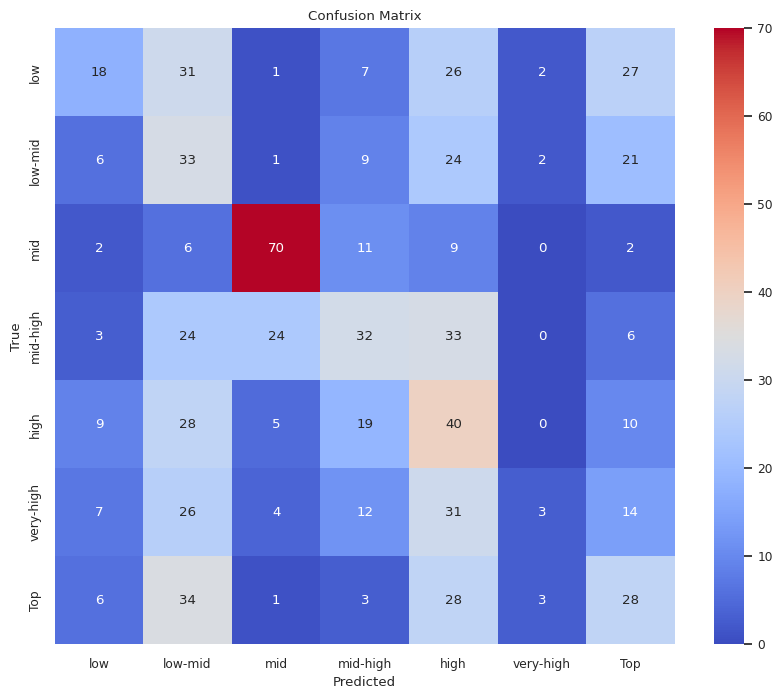

Classification Report:
              precision    recall  f1-score   support

         low       0.35      0.16      0.22       112
     low-mid       0.18      0.34      0.24        96
         mid       0.66      0.70      0.68       100
    mid-high       0.34      0.26      0.30       122
        high       0.21      0.36      0.26       111
   very-high       0.30      0.03      0.06        97
         Top       0.26      0.27      0.27       103

    accuracy                           0.30       741
   macro avg       0.33      0.30      0.29       741
weighted avg       0.33      0.30      0.29       741



In [39]:
# Generate the confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=salary_labels, yticklabels=salary_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=salary_labels))

### <b><span style='color:#85BB65'>|</span> Result and Diccussion</b>

<br>

Based on the scores,the  **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">Gradient Boosting Classifiers</mark>**  performs the best among the tested models, **with an accuracy score of  0.32** . However, the overall performance of all models seems to be quite low, which might indicate that the models are not able to capture the relationship between the features and the target variable (adjusted_salary) very well.
<br>

#### **<span style='color:#85BB65'>There are several ways to potentially improve the model performance:</span>**

1. **Feature Engineering:** Create new features or transform existing features to better capture the relationship between the features and the target variable. For example, you could try combining certain categorical features or creating interaction terms between features.

2. **Feature Selection:** Investigate the importance of each feature in the model and consider removing less important features to reduce noise and improve the model's performance.

3. **Model Tuning:** Perform hyperparameter tuning for the models, especially for complex models like **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">RandomForestRegressor</mark>** and **<mark style="background-color:#85BB65;color:white;border-radius:5px;opacity:1.0">GradientBoostingRegressor</mark>**, to find the best set of hyperparameters that could improve their performance.

4. **Try Different Models:** Experiment with other machine learning algorithms or try ensemble methods, such as stacking or bagging, to see if they can yield better results.

5. **Collect More Data:** If possible, gather more data to provide the models with more information to learn from. This can help improve their performance.

<br>

> Remember that model performance can vary depending on the specific dataset and problem, and it's essential to experiment with different approaches to find the most suitable solution.

# <span style="color:#E888BB; font-size: 1%;">EXTRA | Who makes the most money</span>
<div style="padding: 30px;color:white;margin:10;font-size:150%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/5466790/pexels-photo-5466790.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>EXTRA | Who makes the most money </span></b> </div>

In [ ]:
# Visualize the adjusted_salary by different categories
cat_columns = ['employment_type', 'job_category', 'experience_level', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

# Determine the best categories for maximizing salary
def get_best_categories(df, cat_columns):
    best_categories = {}
    for col in cat_columns:
        best_category = df.groupby(col)['adjusted_salary'].mean().idxmax()
        best_categories[col] = best_category
    return best_categories

best_categories = get_best_categories(df, cat_columns)
print("Best categories for maximizing adjusted salary:")
for key, value in best_categories.items():
    print(f"{key.capitalize()}: {value}")

***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you discovered this notebook to be useful or enjoyable, I'd greatly appreciate any upvotes! Your support motivates me to regularly update and improve it. :-)
   </span>
</div>

<br>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.2em; font-weight: bold;font-family: Arial;">@pannmie</span>
</div>